# 概要
- ベイズ更新を実装する
## 設定
- 袋の中に赤/青の２種類の球が入っているとする。引いた球の色から引いた袋を推定する問題をpythonで実装する。

# 必要なライブラリのimport

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import bernoulli
plt.style.use("ggplot")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings('ignore') # warningが出ないように設定
pd.set_option("display.max_rows", None) # pandasの表示上限をなくす
pd.set_option("display.max_columns", None) # pandasの表示上限をなくす

# データ

In [13]:
# 0:blue, 1:red
# ひいた球のデータ
data = [0, 1, 0, 0, 1, 1, 1]
data_len = len(data)

# 事前分布

In [4]:
# aの袋を引く確率
p_a = 3.0/ 10.0
# bの袋を引く確率
p_b = 5.0/9.0

p_prior = 0.5

In [14]:
# どこまでのデータを使用するか
N_data = data_len

# 尤度関数
## P(data | a)
likehood_a = bernoulli.pmf(data[:N_data], p_a)

## P(data | b)
likehood_b = bernoulli.pmf(data[:N_data], p_b)

In [15]:
likehood_a

array([0.7, 0.3, 0.7, 0.7, 0.3, 0.3, 0.3])

In [16]:
likehood_b

array([0.44444444, 0.55555556, 0.44444444, 0.44444444, 0.55555556,
       0.55555556, 0.55555556])

# 事後分布

In [17]:
pa_posterior = p_prior
pb_posterior = p_prior

pa_posterior *= np.prod(likehood_a)
pb_posterior *= np.prod(likehood_b)

In [18]:
pa_posterior

0.0013891500000000002

In [19]:
pb_posterior

0.004181503162575379

In [22]:
norm = pa_posterior + pb_posterior

In [23]:
df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])

In [25]:
df

,post
0,0.249369
1,0.750631


# 可視化

([<matplotlib.axis.XTick at 0x1184fae48>,
 <a list of 2 Text xticklabel objects>)

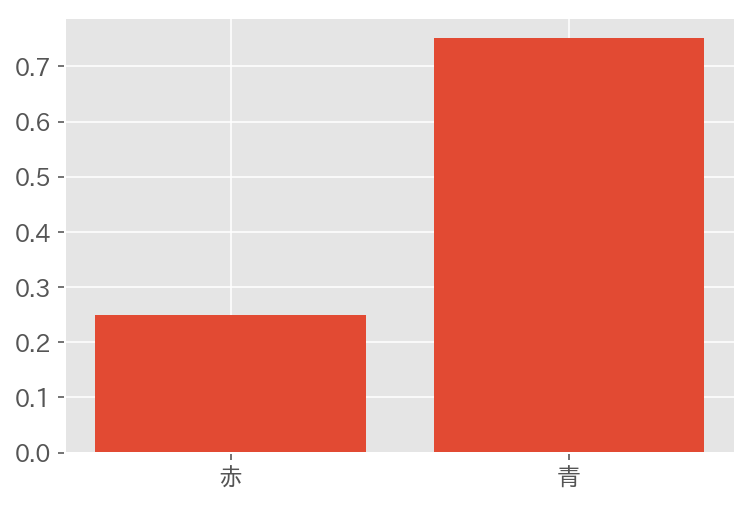

In [36]:
x = np.arange(df.shape[0])
plt.bar(x, df.post)
plt.xticks(x, ["赤", "青"])

# ベイズ更新

0


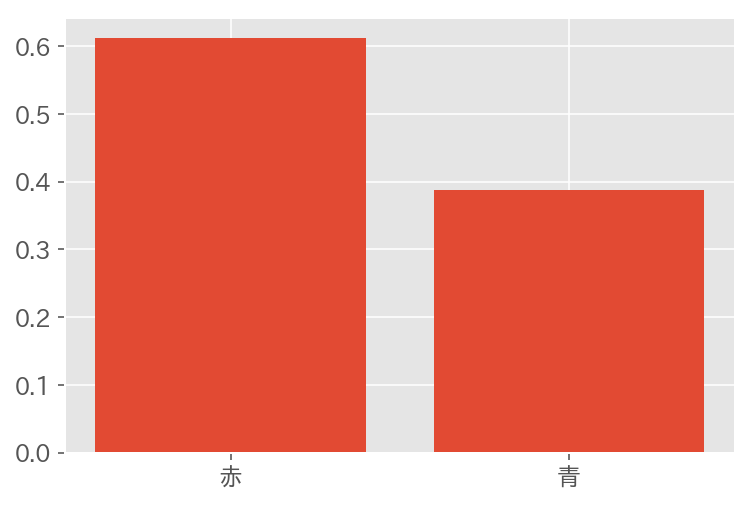

1


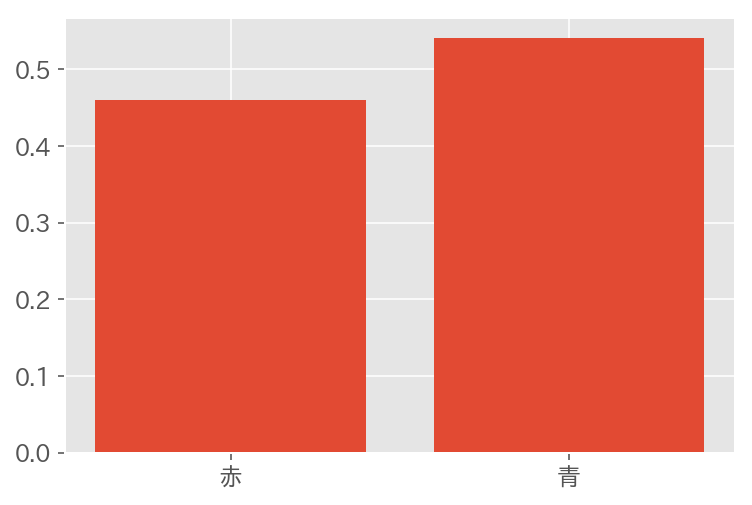

2


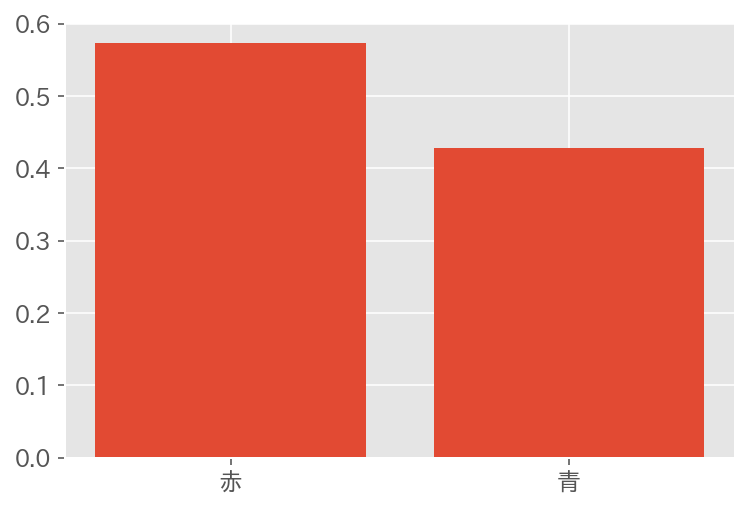

3


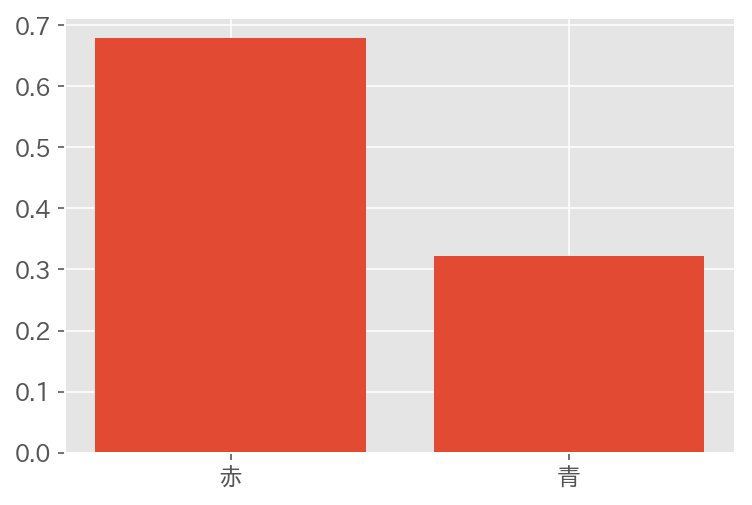

4


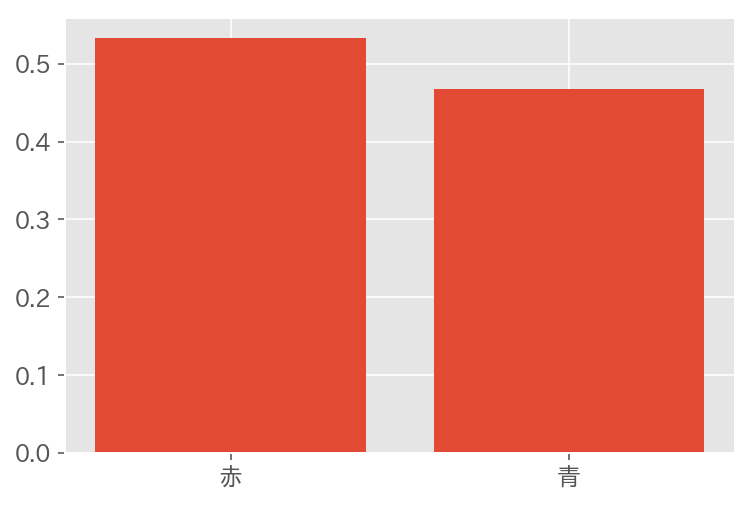

5


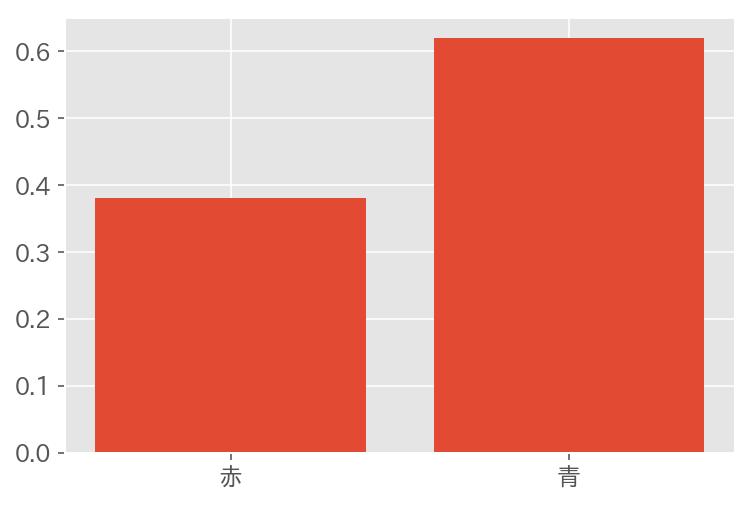

6


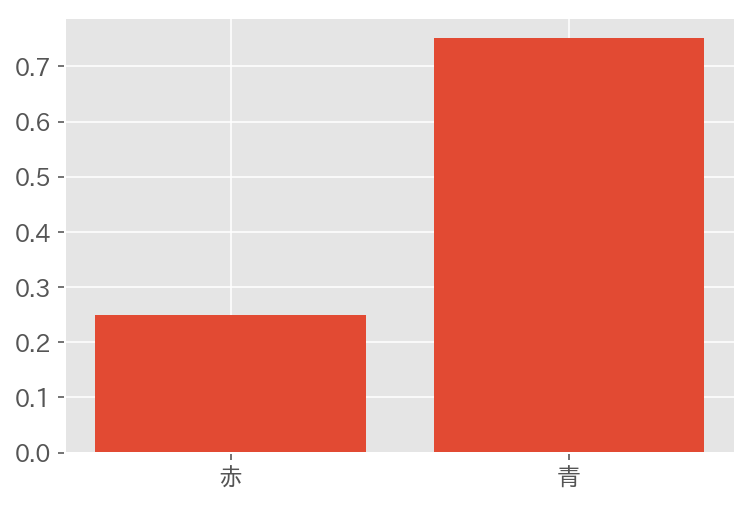

In [45]:
for num in range(data_len):
    # どこまでのデータを使用するか
    N_data = num + 1
    
    # 尤度関数
    ## P(data | a)
    likehood_a = bernoulli.pmf(data[:N_data], p_a)

    ## P(data | b)
    likehood_b = bernoulli.pmf(data[:N_data], p_b)
    
    pa_posterior = p_prior
    pb_posterior = p_prior

    pa_posterior *= np.prod(likehood_a)
    pb_posterior *= np.prod(likehood_b)
    
    norm = pa_posterior + pb_posterior
    
    df = pd.DataFrame([pa_posterior/norm, pb_posterior/norm], columns=["post"])
    
    x = np.arange(df.shape[0])
    print(num)
    plt.bar(x, df.post)
    plt.xticks(x, ["赤", "青"])
    plt.show()